# Explore here

### Load the data

In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
print(data)

             package_name                                             review  \
0     com.facebook.katana   privacy at least put some option appear offli...   
1     com.facebook.katana   messenger issues ever since the last update, ...   
2     com.facebook.katana   profile any time my wife or anybody has more ...   
3     com.facebook.katana   the new features suck for those of us who don...   
4     com.facebook.katana   forced reload on uploading pic on replying co...   
..                    ...                                                ...   
886  com.rovio.angrybirds   loved it i loooooooooooooovvved it because it...   
887  com.rovio.angrybirds   all time legendary game the birthday party le...   
888  com.rovio.angrybirds   ads are way to heavy listen to the bad review...   
889  com.rovio.angrybirds   fun works perfectly well. ads aren't as annoy...   
890  com.rovio.angrybirds   they're everywhere i see angry birds everywhe...   

     polarity  
0           0  
1      

### Inspect the data

In [2]:
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


### Train-test split

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Separate features from labels
labels=data['polarity']
features=data.drop('polarity', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=315
)

### Data encoding

In [5]:
# Get just the reviews from the training data
training_reviews=training_features['review']

# Fit the vectorizer and transform the training reviews into word counts
vec_model=CountVectorizer(stop_words="english")
training_word_counts=vec_model.fit_transform(training_reviews).toarray()

print(f'Word count matrix has {training_word_counts.shape[0]} rows and {training_word_counts.shape[1]} columns')

Word count matrix has 668 rows and 3151 columns


In [6]:
cols =vec_model.get_feature_names_out()
# covert to df
training_word_counts=pd.DataFrame(training_word_counts, columns=cols)
training_word_counts

,000,04,0x,10,100,101,11,113mb,1186,12,...,śŕ,şŕ,šŕ,šŕľ,źŕ,żŕ,żŕľ,žŕ,žŕľ,ˇŕ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### EDA

### Baseline model performance

In [7]:
# Define the model
model = MultinomialNB()
# Cross-validate the model
scores = cross_val_score(model, training_word_counts, training_labels)
# Print the scores
print("cross_val_score scores:", scores)


cross_val_score scores: [0.76865672 0.85820896 0.75373134 0.83458647 0.81203008]


### Missing, and/or extreme values

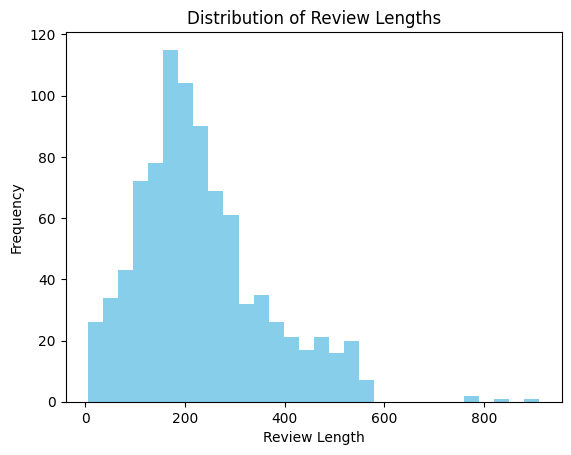

In [8]:
import matplotlib.pyplot as plt
data['review_length'] = data['review'].apply(len)
plt.hist(data['review_length'], bins = 30, color = 'skyblue')
# Adding labels and title
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
# Display the plot
plt.show()

##  Feature selection

In [9]:
word_counts=training_word_counts.sum().tolist()
word_counts

[1,
 1,
 1,
 9,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 5,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 5,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 35,
 1,
 4,
 1,
 1,
 1,
 1,
 6,
 2,
 2,
 1,
 1,
 1,
 1,
 11,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 9,
 7,
 1,
 1,
 32,
 9,
 1,
 1,
 4,
 7,
 1,
 1,
 1,
 3,
 1,
 9,
 1,
 2,
 1,
 1,
 1,
 1,
 37,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 6,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 8,
 3,
 5,
 2,
 2,
 2,
 9,
 1,
 2,
 1,
 1,
 1,
 1,
 43,
 13,
 2,
 1,
 2,
 2,
 2,
 16,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 17,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 332,
 1,
 2,
 1,
 7,
 2,
 2,
 9,
 5,
 1,
 18,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 41,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 1,
 1,
 2,
 4,
 4,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 5,
 1,
 1,
 1,
 3,
 1,
 1,
 4,
 2,
 1,
 5,
 1,
 1,
 2,
 20,
 1,
 1,
 17

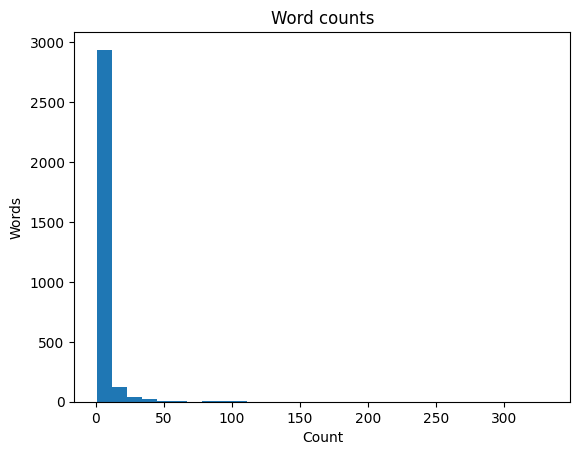

In [10]:
plt.title('Word counts')
plt.xlabel('Count')
plt.ylabel('Words')
plt.hist(word_counts, bins=30)
plt.show()

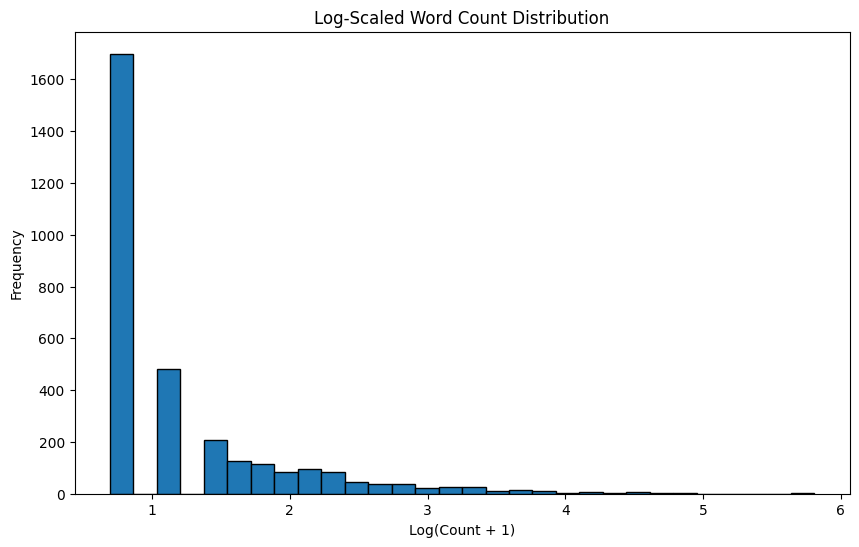

In [11]:
import numpy as np
# Apply a logarithmic transformation to the word counts to better visualize skewed data
log_word_counts = np.log1p(training_word_counts.sum(axis=0))  # Use np.log1p for log(1 + x)
# Create a histogram with the transformed data
plt.figure(figsize=(10, 6))
plt.title('Log-Scaled Word Count Distribution')
plt.xlabel('Log(Count + 1)')
plt.ylabel('Frequency')
plt.hist(log_word_counts, bins=30, edgecolor='black')
plt.show()



In [12]:
# Sum the word counts across all reviews
word_counts = training_word_counts.sum(axis=0)
# Get the words where the count is 1
words_with_count_1 = [word for word, count in zip(cols, word_counts) if count == 1]
# Display the list of words
words_with_count_1

['000',
 '04',
 '0x',
 '101',
 '11',
 '113mb',
 '1186',
 '125',
 '14',
 '14th',
 '15mb',
 '180k',
 '1990s',
 '1lac',
 '1st',
 '2016',
 '22mb',
 '25',
 '2lac',
 '2m',
 '2many',
 '2nd',
 '30mins',
 '367',
 '3gb',
 '3s',
 '3yrs',
 '45',
 '45mb',
 '48gb',
 '50',
 '500k',
 '512kbps',
 '5minutes',
 '5star',
 '6mb',
 '82',
 '86',
 '95',
 'aa',
 'aakhirat',
 'aapsssssss',
 'abilities',
 'abke',
 'absolute',
 'absurdly',
 'accecesible',
 'acces',
 'accesible',
 'accessing',
 'accident',
 'accomplish',
 'accordion',
 'accounts',
 'accumulated',
 'accurate',
 'achievement',
 'achive',
 'act',
 'activities',
 'acts',
 'actual',
 'adage',
 'adblock',
 'addicted',
 'addicting',
 'addition',
 'additional',
 'addons',
 'addressed',
 'adequate',
 'adjusting',
 'adjustment',
 'admin',
 'admit',
 'advanced',
 'adventurous',
 'advertising',
 'adverts',
 'advice',
 'aesthetics',
 'affirm',
 'aficionado',
 'age',
 'agenda',
 'agent',
 'ahead',
 'air',
 'album',
 'alert',
 'alerts',
 'allahsubhanahutallah',


In [13]:
print(f"Total number of words with count 1: {len(words_with_count_1)}")

Total number of words with count 1: 1699


In [17]:
# Define the model
model = MultinomialNB()
# Cross-validate the model
scores_1 = cross_val_score(model, training_word_counts.drop(words_with_count_1, axis = 1), training_labels)
# Print the scores+
print("cross_val_score scores:", scores_1)
print('previous scores:' , scores)


cross_val_score scores: [0.78358209 0.85074627 0.71641791 0.81954887 0.81203008]
previous scores: [0.78358209 0.85074627 0.71641791 0.81954887 0.81203008]


In [18]:
len(training_word_counts)

668

In [20]:
from sklearn.decomposition import TruncatedSVD
# Truncated SVD preprocessing
svd = TruncatedSVD(n_components=100, random_state=315)
training_word_counts_reduced = svd.fit_transform(training_word_counts)
# Convert negative values to absolute values
training_word_counts_reduced = np.abs(training_word_counts_reduced)
# Train and evaluate the model
model = MultinomialNB()
scores = cross_val_score(model, training_word_counts_reduced, training_labels, cv=5, scoring='accuracy')
# Print the cross-validated accuracy
print(f"Model accuracy after Truncated SVD (MultinomialNB): {np.mean(scores):.2f} +/- {np.std(scores):.2f}")

Model accuracy after Truncated SVD (MultinomialNB): 0.67 +/- 0.01


In [21]:
# Variance Thresholding preprocessing
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
training_word_counts_filtered = selector.fit_transform(training_word_counts)
# Train and evaluate the model
model = MultinomialNB()
scores = cross_val_score(model, training_word_counts_filtered, training_labels, cv=5, scoring='accuracy')
# Print the cross-validated accuracy
print(f"Model accuracy after Variance Thresholding (MultinomialNB): {np.mean(scores):.2f} +/- {np.std(scores):.2f}")


Model accuracy after Variance Thresholding (MultinomialNB): 0.80 +/- 0.02


In [22]:
from sklearn.naive_bayes import GaussianNB
# Train and evaluate the GaussianNB model
model2 = GaussianNB()
scores = cross_val_score(model2, training_word_counts_filtered, training_labels, cv=5, scoring='accuracy')
# Print the cross-validated accuracy
print(f"Model accuracy after Variance Thresholding (GaussianNB): {np.mean(scores):.2f} +/- {np.std(scores):.2f}")

Model accuracy after Variance Thresholding (GaussianNB): 0.72 +/- 0.02


In [23]:
from sklearn.naive_bayes import BernoulliNB
# Binarize the dataset (e.g., presence/absence of a word)
training_word_counts_binary = (training_word_counts_filtered > 0).astype(int)
# Train and evaluate the BernoulliNB model
model3 = BernoulliNB()
scores = cross_val_score(model3, training_word_counts_binary, training_labels, cv=5, scoring='accuracy')
# Print the cross-validated accuracy
print(f"Model accuracy after Variance Thresholding (BernoulliNB): {np.mean(scores):.2f} +/- {np.std(scores):.2f}")

Model accuracy after Variance Thresholding (BernoulliNB): 0.80 +/- 0.03
